# Assignment 2(due on 11/08)

## Student:蓝仲依（12332283），Gtihub：LanZhongyi

## 批改人：张鹏

## 得分：46/50

### PS1 Significant earthquakes since 2150 B.C.

In [34]:
# 1. Significant earthquakes since 2150 B.C.
# 1.1
import pandas as pd
Sig_Eqs = pd.read_csv('earthquakes.csv')
Sig_Eqs.groupby(Sig_Eqs['Country']).sum()['Total Deaths'].sort_values(ascending=0).head(10)

Country
CHINA         2041929.0
TURKEY         995648.0
IRAN           758650.0
SYRIA          437700.0
ITALY          422679.0
JAPAN          356083.0
HAITI          323776.0
AZERBAIJAN     310119.0
INDONESIA      282819.0
ARMENIA        189000.0
Name: Total Deaths, dtype: float64

<Axes: xlabel='Year'>

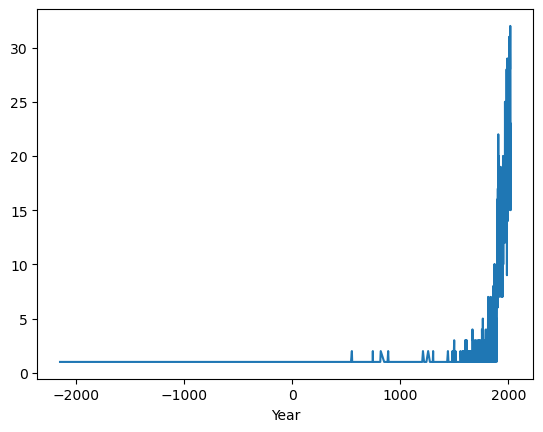

In [35]:
# 1.2
from matplotlib import pyplot as plt
Sig_Eqs.loc[Sig_Eqs['Mag']>6].groupby(Sig_Eqs['Year']).count()['Mag'].plot()

<Axes: xlabel='Year'>

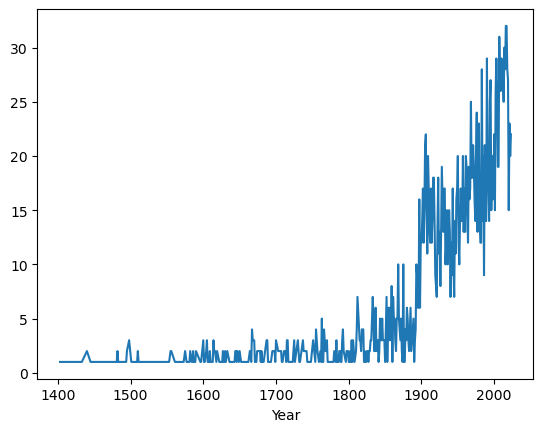

In [36]:
# Plot the time series from 15C to now to make the line clearer
Sig_Eqs.loc[Sig_Eqs['Mag']>6].loc[Sig_Eqs['Year']>1400].groupby(Sig_Eqs['Year']).count()['Mag'].plot()

In [37]:
# 1.3

def CountEq_LargestEq(country):
    
    Eqs_TotalNumber = Sig_Eqs.groupby(Sig_Eqs['Country']).count()['Id']
    Eqs_TotalNumber[country]
    
    reordered = Sig_Eqs.sort_values(['Country', 'Mag'], ascending=[1, 0])
    grouped = reordered.groupby(['Country'])
    largest = grouped.apply(lambda x: x.head(1))
    sort_country = largest.loc[largest['Country'] == country]
    sort_country['Date'] = sort_country['Year'].astype(str) + '/' + sort_country['Mo'].astype(int).astype(str) + '/' +  sort_country['Dy'].astype(int).astype(str)

    return Eqs_TotalNumber[country], sort_country['Date']

CountEq_LargestEq('CHINA')

# for EachCountry in largest['Country']:
#     try:
#         CountEq_LargestEq(EachCountry)
#     except:
#         pass


/tmp/ipykernel_399593/3912245210.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sort_country['Date'] = sort_country['Year'].astype(str) + '/' + sort_country['Mo'].astype(int).astype(str) + '/' +  sort_country['Dy'].astype(int).astype(str)


(620,
 Country     
 CHINA    981    1668/7/25
 Name: Date, dtype: object)

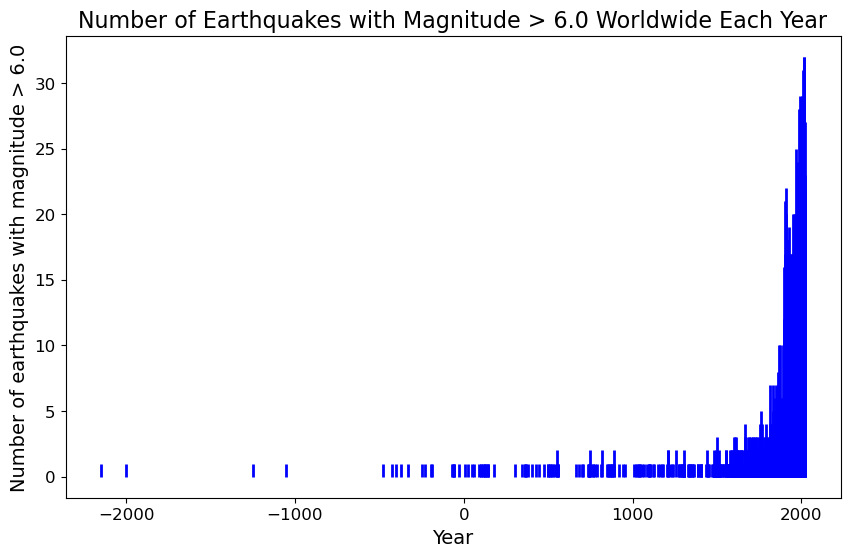

In [38]:
#1.2 助教添加
# 筛选出震级大于6.0的地震
large_quakes = Sig_Eqs[Sig_Eqs['Mag'] > 6.0]

# 按年份对数据进行分组，并得到每年的地震次数
quakes_by_year = large_quakes.groupby('Year')['Mag'].count()

plt.figure(figsize=(10, 6))
plt.vlines(quakes_by_year.index, ymin=0, ymax=quakes_by_year.values, color='blue', linewidth=2)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of earthquakes with magnitude > 6.0', fontsize=14)
plt.title('Number of Earthquakes with Magnitude > 6.0 Worldwide Each Year', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)

# Displaying the plot
plt.show()

In [39]:
#1.3 助教添加
df2 = Sig_Eqs.loc[:,['Country','Mag','Year','Mo','Dy']]
country_list = df2['Country'].unique()

df2['cYear'] = df2['Year'].astype(str)
df2['cMo'] = df2['Mo'].astype(str)
df2['cDy'] = df2['Dy'].astype(str)

df2['cMo'][df2['Mo'] < 10] = '0' + df2['cMo'].astype(str)
df2['cDy'][df2['Dy'] < 10] = '0' + df2['cDy'].astype(str)

df2['DATE'] = df2['cYear'] + '/' + df2['cMo'] + '/' + df2['cDy']

re=pd.DataFrame(columns=['Country','Mag','DATE'])

def CountEq_LargestEq(i):
    df3 = df2[df2['Country'] == str(i)]
    df4 = df3[df3['Mag']==df3['Mag'].max()][['Country','Mag','DATE']] 
    df4['total_number'] = df2[df2['Country'] == str(i)]['Country'].count()
    global re
    re = pd.concat([re, df4], ignore_index=True)
    
for k in country_list:
    CountEq_LargestEq(k)
    
re = re.sort_values('total_number',ascending=False,ignore_index=True)

re

/tmp/ipykernel_399593/1027521480.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cMo'][df2['Mo'] < 10] = '0' + df2['cMo'].astype(str)
/tmp/ipykernel_399593/1027521480.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cDy'][df2['Dy'] < 10] = '0' + df2['cDy'].astype(str)


,Country,Mag,DATE,total_number
0,CHINA,8.5,1668/07.0/25.0,620.0
1,JAPAN,9.1,2011/03.0/11.0,414.0
2,INDONESIA,9.1,2004/12.0/26.0,411.0
3,IRAN,7.9,856/12.0/22.0,384.0
4,TURKEY,7.8,2023/02.0/06.0,335.0
...,...,...,...,...
164,CENTRAL AFRICAN REPUBLIC,4.8,1921/09.0/16.0,1.0
165,NORWAY,5.8,1819/08.0/31.0,1.0
166,PALAU,7.6,1914/10.0/23.0,1.0
167,FRENCH POLYNESIA,6.5,1848/07.0/12.0,1.0


### 第一题代码运行正常，可以输出正确结果，报告中也展示了输出内容，也针对问题给出文字分析。最后一问只写出函数，没有排序结果。建议循环函数来得到各个国家的结果，上面助教补充代码仅供参考。第二问绘图有一点点问题，建议绘制竖线图，见上面代码助教添加代码


### 得分：22/25
### --------------------------------------------------------------------------------------------

### PS2 2. Wind speed in Shenzhen during the past 10 years

In [18]:
# 2. Wind speed in Shenzhen during the past 10 years
import pandas as pd
wind = pd.read_csv('2281305.csv')
wind.loc[(wind['WND'].str.contains('N')) | (wind['WND'].str.contains('C'))].loc[wind['WND'].str[-1]=='1']

/tmp/ipykernel_399593/1175231357.py:3: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  wind = pd.read_csv('2281305.csv')


,STATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AJ1,...,OD1,OD2,QUALITY_CONTROL.1,REM,REPORT_TYPE.1,SLP,SOURCE.1,TMP,VIS,WND
0,59493099999,2010-01-02T00:00:00,4,SY-MT,ZGSZ,V020,"06,0000,2,1","24,0000,2,1",NaN,NaN,...,NaN,NaN,V020,SYN088AAXX 02001 59493 11740 80402 10161 2013...,SY-MT,"10161,1",4,"+0161,1","004000,1,N,1","040,1,N,0020,1"
2,59493099999,2010-01-02T02:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020200Z 00000MPS 2600 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002600,1,N,1","999,9,C,0000,1"
3,59493099999,2010-01-02T03:00:00,4,SY-MT,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,SYN066AAXX 02031 59493 41750 81401 10192 2014...,SY-MT,"10169,1",4,"+0192,1","005000,1,N,1","140,1,N,0010,1"
4,59493099999,2010-01-02T04:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020400Z 30004MPS 2100 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002100,1,N,1","300,1,N,0040,1"
5,59493099999,2010-01-02T05:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET078METAR ZGSZ 020500Z 32005MPS 1800 R15/140...,FM-15,"99999,9",4,"+0170,1","001800,1,N,1","320,1,N,0050,1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111977,59493099999,2020-09-11T15:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET052METAR ZGSZ 111500Z 16005MPS CAVOK 29/27 ...,FM-15,"99999,9",4,"+0290,1","009900,5,9,9","160,1,N,0050,1"
111978,59493099999,2020-09-11T16:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET058METAR ZGSZ 111600Z 17004MPS 9999 SCT020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","170,1,N,0040,1"
111979,59493099999,2020-09-11T17:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET058METAR ZGSZ 111700Z 17003MPS 9999 BKN020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","170,1,N,0030,1"
111980,59493099999,2020-09-11T18:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET058METAR ZGSZ 111800Z 18004MPS 9999 BKN020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","180,1,N,0040,1"


In [19]:
wind['Date'] = pd.to_datetime(wind['DATE']).dt.date
wind['Year'] = pd.to_datetime(wind['Date']).dt.year
wind['Month'] = pd.to_datetime(wind['Date']).dt.month

wind['WindSpeed'] = wind['WND'].str[8:12].astype(int)
#wind.loc[(wind['WindSpeed']!=9999)]
wind['WindSpeed'] = wind.loc[(wind['WindSpeed']!=9999)]#助教修改 loc函数不能剔除数据要进行一个变量赋值
wind['WindSpeed'] = wind['WindSpeed'] / 10

wind.groupby(['Year', 'Month']).mean()['WindSpeed'].plot(ylabel='Wind Speed (m/s)')

TypeError: Could not convert 2010-01-02T00:00:002010-01-02T01:00:002010-01-02T02:00:002010-01-02T03:00:002010-01-02T04:00:002010-01-02T05:00:002010-01-02T06:00:002010-01-02T07:00:002010-01-02T08:00:002010-01-02T09:00:002010-01-02T10:00:002010-01-02T11:00:002010-01-02T12:00:002010-01-02T13:00:002010-01-02T14:00:002010-01-02T15:00:002010-01-02T16:00:002010-01-02T17:00:002010-01-02T18:00:002010-01-02T19:00:002010-01-02T20:00:002010-01-02T21:00:002010-01-02T22:00:002010-01-02T23:00:002010-01-03T00:00:002010-01-03T01:00:002010-01-03T02:00:002010-01-03T03:00:002010-01-03T04:00:002010-01-03T05:00:002010-01-03T06:00:002010-01-03T07:00:002010-01-03T08:00:002010-01-03T09:00:002010-01-03T10:00:002010-01-03T11:00:002010-01-03T12:00:002010-01-03T13:00:002010-01-03T14:00:002010-01-03T15:00:002010-01-03T16:00:002010-01-03T17:00:002010-01-03T18:00:002010-01-03T19:00:002010-01-03T20:00:002010-01-03T21:00:002010-01-03T22:00:002010-01-03T23:00:002010-01-04T00:00:002010-01-04T01:00:002010-01-04T02:00:002010-01-04T03:00:002010-01-04T04:00:002010-01-04T05:00:002010-01-04T06:00:002010-01-04T07:00:002010-01-04T08:00:002010-01-04T09:00:002010-01-04T10:00:002010-01-04T11:00:002010-01-04T12:00:002010-01-04T13:00:002010-01-04T14:00:002010-01-04T15:00:002010-01-04T16:00:002010-01-04T17:00:002010-01-04T18:00:002010-01-04T19:00:002010-01-04T20:00:002010-01-04T21:00:002010-01-04T22:00:002010-01-04T23:00:002010-01-05T00:00:002010-01-05T01:00:002010-01-05T02:00:002010-01-05T03:00:002010-01-05T04:00:002010-01-05T05:00:002010-01-05T06:00:002010-01-05T07:00:002010-01-05T08:00:002010-01-05T09:00:002010-01-05T10:00:002010-01-05T11:00:002010-01-05T12:00:002010-01-05T13:00:002010-01-05T14:00:002010-01-05T15:00:002010-01-05T16:00:002010-01-05T17:00:002010-01-05T18:00:002010-01-05T19:00:002010-01-05T20:00:002010-01-05T21:00:002010-01-05T22:00:002010-01-05T23:00:002010-01-06T00:00:002010-01-06T01:00:002010-01-06T02:00:002010-01-06T03:00:002010-01-06T04:00:002010-01-06T05:00:002010-01-06T06:00:002010-01-06T07:00:002010-01-06T08:00:002010-01-06T09:00:002010-01-06T10:00:002010-01-06T11:00:002010-01-06T12:00:002010-01-06T13:00:002010-01-06T14:00:002010-01-06T15:00:002010-01-06T16:00:002010-01-06T17:00:002010-01-06T18:00:002010-01-06T19:00:002010-01-06T20:00:002010-01-06T21:00:002010-01-06T22:00:002010-01-06T23:00:002010-01-07T00:00:002010-01-07T01:00:002010-01-07T02:00:002010-01-07T03:00:002010-01-07T04:00:002010-01-07T05:00:002010-01-07T06:00:002010-01-07T07:00:002010-01-07T08:00:002010-01-07T09:00:002010-01-07T10:00:002010-01-07T11:00:002010-01-07T12:00:002010-01-07T13:00:002010-01-07T14:00:002010-01-07T15:00:002010-01-07T16:00:002010-01-07T17:00:002010-01-07T18:00:002010-01-07T19:00:002010-01-07T20:00:002010-01-07T21:00:002010-01-07T22:00:002010-01-07T23:00:002010-01-08T00:00:002010-01-08T01:00:002010-01-08T02:00:002010-01-08T03:00:002010-01-08T04:00:002010-01-08T05:00:002010-01-08T06:00:002010-01-08T07:00:002010-01-08T08:00:002010-01-08T09:00:002010-01-08T10:00:002010-01-08T11:00:002010-01-08T12:00:002010-01-08T13:00:002010-01-08T14:00:002010-01-08T15:00:002010-01-08T16:00:002010-01-08T17:00:002010-01-08T18:00:002010-01-08T19:00:002010-01-08T20:00:002010-01-08T21:00:002010-01-08T22:00:002010-01-08T23:00:002010-01-09T00:00:002010-01-09T01:00:002010-01-09T02:00:002010-01-09T03:00:002010-01-09T04:00:002010-01-09T05:00:002010-01-09T06:00:002010-01-09T07:00:002010-01-09T08:00:002010-01-09T09:00:002010-01-09T10:00:002010-01-09T11:00:002010-01-09T12:00:002010-01-09T13:00:002010-01-09T14:00:002010-01-09T15:00:002010-01-09T16:00:002010-01-09T17:00:002010-01-09T18:00:002010-01-09T19:00:002010-01-09T20:00:002010-01-09T21:00:002010-01-09T22:00:002010-01-09T23:00:002010-01-10T00:00:002010-01-10T01:00:002010-01-10T02:00:002010-01-10T03:00:002010-01-10T04:00:002010-01-10T05:00:002010-01-10T06:00:002010-01-10T07:00:002010-01-10T08:00:002010-01-10T09:00:002010-01-10T10:00:002010-01-10T11:00:002010-01-10T12:00:002010-01-10T13:00:002010-01-10T14:00:002010-01-10T15:00:002010-01-10T16:00:002010-01-10T17:00:002010-01-10T18:00:002010-01-10T19:00:002010-01-10T20:00:002010-01-10T21:00:002010-01-10T22:00:002010-01-10T23:00:002010-01-11T00:00:002010-01-11T01:00:002010-01-11T02:00:002010-01-11T03:00:002010-01-11T04:00:002010-01-11T05:00:002010-01-11T06:00:002010-01-11T07:00:002010-01-11T08:00:002010-01-11T09:00:002010-01-11T10:00:002010-01-11T11:00:002010-01-11T12:00:002010-01-11T13:00:002010-01-11T14:00:002010-01-11T15:00:002010-01-11T16:00:002010-01-11T17:00:002010-01-11T18:00:002010-01-11T19:00:002010-01-11T20:00:002010-01-11T21:00:002010-01-11T22:00:002010-01-11T23:00:002010-01-12T00:00:002010-01-12T01:00:002010-01-12T02:00:002010-01-12T03:00:002010-01-12T04:00:002010-01-12T05:00:002010-01-12T06:00:002010-01-12T07:00:002010-01-12T08:00:002010-01-12T09:00:002010-01-12T10:00:002010-01-12T11:00:002010-01-12T12:00:002010-01-12T13:00:002010-01-12T14:00:002010-01-12T15:00:002010-01-12T16:00:002010-01-12T17:00:002010-01-12T18:00:002010-01-12T19:00:002010-01-12T20:00:002010-01-12T21:00:002010-01-12T22:00:002010-01-12T23:00:002010-01-13T00:00:002010-01-13T01:00:002010-01-13T02:00:002010-01-13T03:00:002010-01-13T04:00:002010-01-13T05:00:002010-01-13T06:00:002010-01-13T07:00:002010-01-13T08:00:002010-01-13T09:00:002010-01-13T10:00:002010-01-13T11:00:002010-01-13T12:00:002010-01-13T13:00:002010-01-13T14:00:002010-01-13T15:00:002010-01-13T16:00:002010-01-13T17:00:002010-01-13T18:00:002010-01-13T19:00:002010-01-13T20:00:002010-01-13T21:00:002010-01-13T22:00:002010-01-13T23:00:002010-01-14T00:00:002010-01-14T01:00:002010-01-14T02:00:002010-01-14T03:00:002010-01-14T04:00:002010-01-14T05:00:002010-01-14T06:00:002010-01-14T07:00:002010-01-14T08:00:002010-01-14T09:00:002010-01-14T10:00:002010-01-14T11:00:002010-01-14T12:00:002010-01-14T13:00:002010-01-14T14:00:002010-01-14T15:00:002010-01-14T16:00:002010-01-14T17:00:002010-01-14T18:00:002010-01-14T19:00:002010-01-14T21:00:002010-01-14T23:00:002010-01-15T00:00:002010-01-15T01:00:002010-01-15T02:00:002010-01-15T03:00:002010-01-15T04:00:002010-01-15T05:00:002010-01-15T06:00:002010-01-15T07:00:002010-01-15T08:00:002010-01-15T09:00:002010-01-15T10:00:002010-01-15T11:00:002010-01-15T12:00:002010-01-15T13:00:002010-01-15T14:00:002010-01-15T15:00:002010-01-15T16:00:002010-01-15T17:00:002010-01-15T18:00:002010-01-15T19:00:002010-01-15T20:00:002010-01-15T21:00:002010-01-15T22:00:002010-01-15T23:00:002010-01-16T00:00:002010-01-16T01:00:002010-01-16T02:00:002010-01-16T03:00:002010-01-16T04:00:002010-01-16T05:00:002010-01-16T06:00:002010-01-16T07:00:002010-01-16T08:00:002010-01-16T09:00:002010-01-16T10:00:002010-01-16T11:00:002010-01-16T12:00:002010-01-16T13:00:002010-01-16T14:00:002010-01-16T15:00:002010-01-16T16:00:002010-01-16T17:00:002010-01-16T18:00:002010-01-16T19:00:002010-01-16T20:00:002010-01-16T21:00:002010-01-16T22:00:002010-01-16T23:00:002010-01-17T00:00:002010-01-17T01:00:002010-01-17T02:00:002010-01-17T03:00:002010-01-17T04:00:002010-01-17T05:00:002010-01-17T06:00:002010-01-17T07:00:002010-01-17T08:00:002010-01-17T09:00:002010-01-17T10:00:002010-01-17T11:00:002010-01-17T12:00:002010-01-17T13:00:002010-01-17T14:00:002010-01-17T15:00:002010-01-17T16:00:002010-01-17T17:00:002010-01-17T18:00:002010-01-17T19:00:002010-01-17T20:00:002010-01-17T21:00:002010-01-17T22:00:002010-01-17T23:00:002010-01-18T00:00:002010-01-18T01:00:002010-01-18T02:00:002010-01-18T03:00:002010-01-18T04:00:002010-01-18T05:00:002010-01-18T06:00:002010-01-18T07:00:002010-01-18T08:00:002010-01-18T09:00:002010-01-18T10:00:002010-01-18T11:00:002010-01-18T12:00:002010-01-18T13:00:002010-01-18T14:00:002010-01-18T15:00:002010-01-18T16:00:002010-01-18T17:00:002010-01-18T18:00:002010-01-18T19:00:002010-01-18T20:00:002010-01-18T21:00:002010-01-18T22:00:002010-01-18T23:00:002010-01-19T00:00:002010-01-19T01:00:002010-01-19T02:00:002010-01-19T03:00:002010-01-19T04:00:002010-01-19T05:00:002010-01-19T06:00:002010-01-19T07:00:002010-01-19T08:00:002010-01-19T09:00:002010-01-19T10:00:002010-01-19T11:00:002010-01-19T12:00:002010-01-19T13:00:002010-01-19T14:00:002010-01-19T15:00:002010-01-19T16:00:002010-01-19T17:00:002010-01-19T18:00:002010-01-19T19:00:002010-01-19T20:00:002010-01-19T21:00:002010-01-19T22:00:002010-01-19T23:00:002010-01-20T00:00:002010-01-20T01:00:002010-01-20T02:00:002010-01-20T03:00:002010-01-20T04:00:002010-01-20T05:00:002010-01-20T06:00:002010-01-20T07:00:002010-01-20T08:00:002010-01-20T09:00:002010-01-20T10:00:002010-01-20T11:00:002010-01-20T12:00:002010-01-20T13:00:002010-01-20T14:00:002010-01-20T15:00:002010-01-20T16:00:002010-01-20T17:00:002010-01-20T18:00:002010-01-20T19:00:002010-01-20T20:00:002010-01-20T21:00:002010-01-20T22:00:002010-01-20T23:00:002010-01-21T00:00:002010-01-21T01:00:002010-01-21T02:00:002010-01-21T03:00:002010-01-21T04:00:002010-01-21T05:00:002010-01-21T06:00:002010-01-21T07:00:002010-01-21T08:00:002010-01-21T09:00:002010-01-21T10:00:002010-01-21T11:00:002010-01-21T12:00:002010-01-21T13:00:002010-01-21T14:00:002010-01-21T15:00:002010-01-21T16:00:002010-01-21T17:00:002010-01-21T18:00:002010-01-21T19:00:002010-01-21T20:00:002010-01-21T21:00:002010-01-21T22:00:002010-01-21T23:00:002010-01-22T00:00:002010-01-22T01:00:002010-01-22T02:00:002010-01-22T03:00:002010-01-22T04:00:002010-01-22T05:00:002010-01-22T06:00:002010-01-22T07:00:002010-01-22T08:00:002010-01-22T09:00:002010-01-22T10:00:002010-01-22T11:00:002010-01-22T12:00:002010-01-22T13:00:002010-01-22T14:00:002010-01-22T15:00:002010-01-22T16:00:002010-01-22T17:00:002010-01-22T18:00:002010-01-22T19:00:002010-01-22T20:00:002010-01-22T21:00:002010-01-22T22:00:002010-01-22T23:00:002010-01-23T00:00:002010-01-23T01:00:002010-01-23T02:00:002010-01-23T03:00:002010-01-23T04:00:002010-01-23T05:00:002010-01-23T06:00:002010-01-23T07:00:002010-01-23T08:00:002010-01-23T09:00:002010-01-23T10:00:002010-01-23T11:00:002010-01-23T12:00:002010-01-23T13:00:002010-01-23T14:00:002010-01-23T15:00:002010-01-23T16:00:002010-01-23T17:00:002010-01-23T18:00:002010-01-23T19:00:002010-01-23T20:00:002010-01-23T21:00:002010-01-23T22:00:002010-01-23T23:00:002010-01-24T00:00:002010-01-24T01:00:002010-01-24T02:00:002010-01-24T03:00:002010-01-24T04:00:002010-01-24T05:00:002010-01-24T06:00:002010-01-24T07:00:002010-01-24T08:00:002010-01-24T09:00:002010-01-24T10:00:002010-01-24T11:00:002010-01-24T12:00:002010-01-24T13:00:002010-01-24T14:00:002010-01-24T15:00:002010-01-24T16:00:002010-01-24T17:00:002010-01-24T18:00:002010-01-24T19:00:002010-01-24T20:00:002010-01-24T21:00:002010-01-24T22:00:002010-01-24T23:00:002010-01-25T00:00:002010-01-25T01:00:002010-01-25T02:00:002010-01-25T03:00:002010-01-25T04:00:002010-01-25T05:00:002010-01-25T06:00:002010-01-25T07:00:002010-01-25T08:00:002010-01-25T09:00:002010-01-25T10:00:002010-01-25T11:00:002010-01-25T12:00:002010-01-25T13:00:002010-01-25T14:00:002010-01-25T15:00:002010-01-25T16:00:002010-01-25T17:00:002010-01-25T18:00:002010-01-25T19:00:002010-01-25T20:00:002010-01-25T21:00:002010-01-25T22:00:002010-01-25T23:00:002010-01-26T00:00:002010-01-26T01:00:002010-01-26T02:00:002010-01-26T03:00:002010-01-26T04:00:002010-01-26T05:00:002010-01-26T06:00:002010-01-26T07:00:002010-01-26T08:00:002010-01-26T09:00:002010-01-26T10:00:002010-01-26T11:00:002010-01-26T12:00:002010-01-26T13:00:002010-01-26T14:00:002010-01-26T15:00:002010-01-26T16:00:002010-01-26T17:00:002010-01-26T18:00:002010-01-26T19:00:002010-01-26T20:00:002010-01-26T21:00:002010-01-26T22:00:002010-01-26T23:00:002010-01-27T00:00:002010-01-27T01:00:002010-01-27T02:00:002010-01-27T03:00:002010-01-27T04:00:002010-01-27T05:00:002010-01-27T06:00:002010-01-27T07:00:002010-01-27T08:00:002010-01-27T09:00:002010-01-27T10:00:002010-01-27T11:00:002010-01-27T12:00:002010-01-27T13:00:002010-01-27T14:00:002010-01-27T15:00:002010-01-27T16:00:002010-01-27T17:00:002010-01-27T18:00:002010-01-27T19:00:002010-01-27T20:00:002010-01-27T21:00:002010-01-27T22:00:002010-01-27T23:00:002010-01-28T00:00:002010-01-28T01:00:002010-01-28T02:00:002010-01-28T03:00:002010-01-28T04:00:002010-01-28T05:00:002010-01-28T06:00:002010-01-28T07:00:002010-01-28T08:00:002010-01-28T09:00:002010-01-28T10:00:002010-01-28T11:00:002010-01-28T12:00:002010-01-28T13:00:002010-01-28T14:00:002010-01-28T15:00:002010-01-28T16:00:002010-01-28T17:00:002010-01-28T18:00:002010-01-28T19:00:002010-01-28T20:00:002010-01-28T21:00:002010-01-28T22:00:002010-01-28T23:00:002010-01-29T00:00:002010-01-29T01:00:002010-01-29T02:00:002010-01-29T03:00:002010-01-29T04:00:002010-01-29T05:00:002010-01-29T06:00:002010-01-29T07:00:002010-01-29T08:00:002010-01-29T09:00:002010-01-29T10:00:002010-01-29T11:00:002010-01-29T12:00:002010-01-29T13:00:002010-01-29T14:00:002010-01-29T15:00:002010-01-29T16:00:002010-01-29T17:00:002010-01-29T18:00:002010-01-29T19:00:002010-01-29T20:00:002010-01-29T21:00:002010-01-29T22:00:002010-01-29T23:00:002010-01-30T00:00:002010-01-30T01:00:002010-01-30T02:00:002010-01-30T03:00:002010-01-30T04:00:002010-01-30T05:00:002010-01-30T06:00:002010-01-30T07:00:002010-01-30T08:00:002010-01-30T09:00:002010-01-30T10:00:002010-01-30T11:00:002010-01-30T12:00:002010-01-30T13:00:002010-01-30T14:00:002010-01-30T15:00:002010-01-30T16:00:002010-01-30T17:00:002010-01-30T18:00:002010-01-30T19:00:002010-01-30T20:00:002010-01-30T21:00:002010-01-30T22:00:002010-01-30T23:00:002010-01-31T00:00:002010-01-31T01:00:002010-01-31T02:00:002010-01-31T03:00:002010-01-31T04:00:002010-01-31T05:00:002010-01-31T06:00:002010-01-31T07:00:002010-01-31T08:00:002010-01-31T09:00:002010-01-31T10:00:002010-01-31T11:00:002010-01-31T12:00:002010-01-31T13:00:002010-01-31T14:00:002010-01-31T15:00:002010-01-31T16:00:002010-01-31T17:00:002010-01-31T18:00:002010-01-31T19:00:002010-01-31T20:00:002010-01-31T21:00:002010-01-31T22:00:002010-01-31T23:00:00 to numeric

/tmp/ipykernel_399593/256303067.py:6: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  WDS = pd.read_csv('2281305.csv')[['DATE','WND']]


Text(0, 0.5, 'Wind speed/m¡¤${s^-1}$')

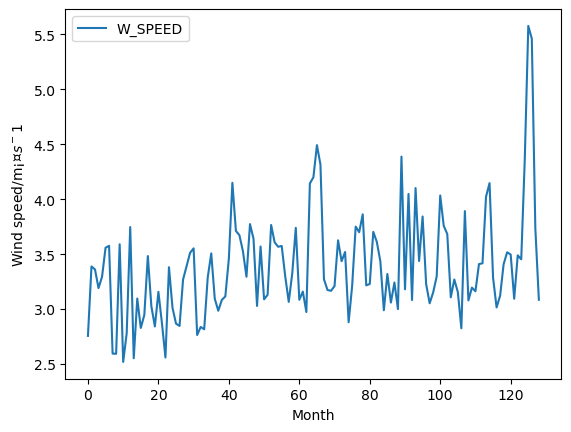

In [32]:
#助教添加
import numpy as np
import pandas as pd
import matplotlib as plt

WDS = pd.read_csv('2281305.csv')[['DATE','WND']]
WDS = pd.merge(WDS,WDS['WND'].str.split(',', expand=True),left_index=True,right_index=True)
WDS['DATE'] = pd.to_datetime(WDS['DATE'])
WDS = WDS.drop(columns=['WND',0,1,2])
WDS.columns = ['DATE','W_SPEED','SPEED_QLT']
WDS = WDS.set_index('DATE')

np.unique(WDS['W_SPEED'])
np.unique(WDS['SPEED_QLT'])
WDS = WDS[WDS['W_SPEED']!='9999']
WDS = WDS[WDS['SPEED_QLT']!='9']
WDS = WDS.astype('int')

WDS_M = WDS['W_SPEED'].resample('M').mean()
WDS_M = WDS_M.reset_index(drop=False)
WDS_M['DATE'] = WDS_M['DATE'].dt.strftime('%Y-%m')
WDS_M.set_index('DATE')
WDS_M['W_SPEED'] = WDS_M['W_SPEED']/10
p = WDS_M.plot();
p.set_xlabel('Month');
p.set_ylabel('Wind speed/m¡¤${s^-1}$')

### ### 第二题代码运行正常，可以输出，但是结果部分月均风速变化太大不符合常理，这其中的问题很可能是没有对数据进行清洗造成的。“9999”的不是风速值，只是无效值的另一个表示方法，需要替换成 Nan。
### 上述代码为助教添加，仅供参考
### 得分9/10
### ---------------------------------------------------------------------------------------------

### PS2 3.Explore a data set

In [21]:
# 3. Explore a data set
GZ = pd.read_csv('CHM00059287.csv')
GZ = GZ.loc[GZ['TAVG']!=None]
GZ['realTAVG'] = GZ['TAVG'] / 10
GZ.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,realTAVG
0,CHM00059287,1945/11/30,23.217,113.483,71,"GUANGZHOU, CH",NaN,NaN,NaN,NaN,NaN,NaN,107.0,"H,,S",10.7
1,CHM00059287,1945/12/1,23.217,113.483,71,"GUANGZHOU, CH",NaN,NaN,NaN,NaN,NaN,NaN,123.0,"H,,S",12.3
2,CHM00059287,1945/12/2,23.217,113.483,71,"GUANGZHOU, CH",NaN,NaN,NaN,NaN,NaN,NaN,136.0,"H,,S",13.6
3,CHM00059287,1945/12/3,23.217,113.483,71,"GUANGZHOU, CH",NaN,NaN,NaN,NaN,NaN,NaN,152.0,"H,,S",15.2
4,CHM00059287,1945/12/4,23.217,113.483,71,"GUANGZHOU, CH",NaN,NaN,NaN,NaN,NaN,NaN,144.0,"H,,S",14.4


In [22]:
GZ['YEAR'] = pd.to_datetime(GZ['DATE']).dt.year
GZ = GZ.loc[GZ['YEAR']>=1952]
GZ.groupby(['YEAR']).mean()['realTAVG'].plot(ylabel='AVERAGE TEMPERATURE')

TypeError: Could not convert CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287CHM00059287 to numeric

In [23]:
GZ.groupby(['YEAR']).median()#['realTAVG'].plot(ylabel='MEDIAN of DAILY AVERAGE TEMPERATURE')

TypeError: could not convert string to float: 'CHM00059287'

In [10]:
GZ.groupby(['YEAR']).min()['realTAVG'].plot(ylabel='MINIMUM DAILY AVERAGE TEMPERATURE')

TypeError: '<=' not supported between instances of 'float' and 'str'

C:\Users\LZY\AppData\Local\Temp\ipykernel_19208\1189171951.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  GZ.groupby(['YEAR']).max()['realTAVG'].plot(ylabel='MAXIMUM DAILY AVERAGE TEMPERATURE')


<Axes: xlabel='YEAR', ylabel='MAXIMUM DAILY AVERAGE TEMPERATURE'>

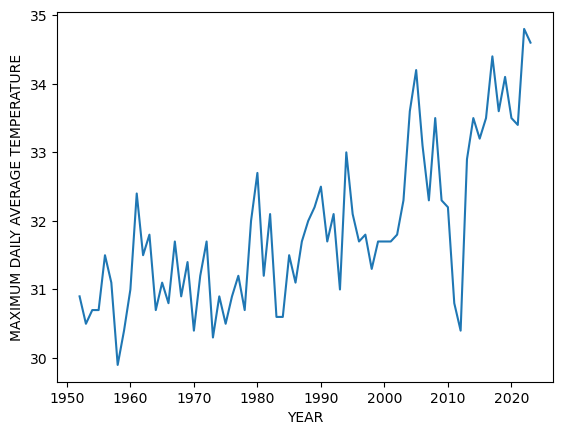

In [143]:
GZ.groupby(['YEAR']).max()['realTAVG'].plot(ylabel='MAXIMUM DAILY AVERAGE TEMPERATURE')

C:\Users\LZY\AppData\Local\Temp\ipykernel_19208\3321314209.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  GZ.groupby(['YEAR']).std()['realTAVG'].plot(ylabel='STD of ANNUAL AVERAGE TEMPERATURE')


<Axes: xlabel='YEAR', ylabel='STD of ANNUAL AVERAGE TEMPERATURE'>

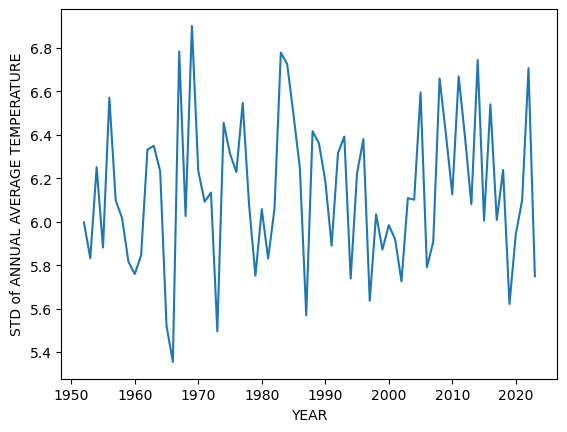

In [153]:
GZ.groupby(['YEAR']).std()['realTAVG'].plot(ylabel='STD of ANNUAL AVERAGE TEMPERATURE')

### 第三题代码输出结果正确，也在报告中展现了输出结果。但抱歉因版本问题助教代码报错，但git有详细结果
### 得分15/15
